<a href="https://colab.research.google.com/github/EllaSeibert/Final_Project_Astro_9/blob/main/Exoplanet_Habitability_ASTRO_9_Group_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
#Group Two: Srisha, Quinn, Ella, Saniya, Raka, Joohyun

#Step One: Importing Data - COMPLETE

#Step Two (Srisha,Ella): Show Imbalance in Data - COMPLETE
  #Before and After on dataset categories chart with resampling (Ella)
  #Show percent of null values for each feature (Srisha)

#Step Three (Raka, Saniya, Srisha, Joohyun): Data Cleaning - COMPLETE
  #Fill missing values .median() grouped by P_HABITABLE
  #Control for outliers via clipping (Srisha)

#Step Four (Raka, Ella): First Analysis// Earth Similarity Index (ESI) + Planet Terrains - COMPLETE
  #Box Plot, Violin Plot with three indicators
  #Establish correlation between higher ESI and habitability

#Step Five (Quinn, Ella): Second Analysis //  Planet Mass, Radius,Eccentricity - COMPLETE
  #Bar Graph with Three variables

#Step Six (Ella, Srisha) : Statistical Analysis (T-test)

#Step Seven (Joohyun): Caveats and Limitations to our Work/Concluding Thoughts
'''

In [ ]:
'''
Dataset Link: https://www.kaggle.com/code/chandrimad31/a-small-research-on-exoplanet-habitability/input
'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Step One: Importing Exoplanet Dataset from PHL 2019
data = pd.read_csv('phl_exoplanet_catalog_2019.csv')
data.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

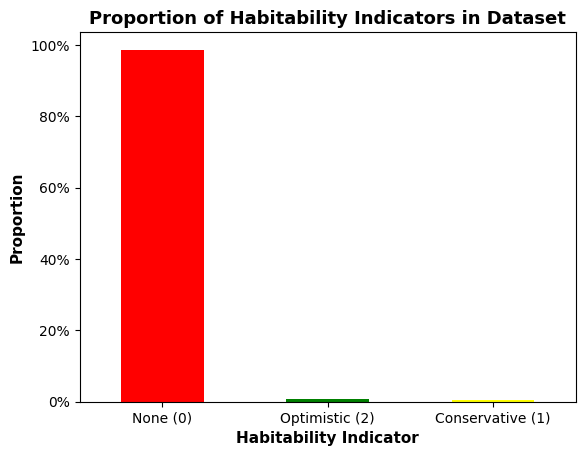

<Figure size 9000x5000 with 0 Axes>

In [ ]:
#Step Two: Analyzing Balance of Habitability Indicators
import matplotlib.ticker as mticker

#adding new series to df with labeled data
data.loc[data.P_HABITABLE == 0 , 'P_HABITABLE_TEXT'] ='None (0)'
data.loc[data.P_HABITABLE == 1 , 'P_HABITABLE_TEXT'] ='Conservative (1)'
data.loc[data.P_HABITABLE == 2 , 'P_HABITABLE_TEXT'] ='Optimistic (2)'

#bar graph for imbalanced dataset
habitability_column = data['P_HABITABLE_TEXT'].value_counts(normalize = True, ascending = False).plot(kind='bar',
                                                                                                 color= ['red','green','yellow'])
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xticks(rotation=0)
plt.title('Proportion of Habitability Indicators in Dataset',fontsize=13,fontweight='bold')
plt.xlabel('Habitability Indicator',fontsize=11,fontweight='bold')
plt.ylabel('Proportion',fontsize=11,fontweight='bold')
plt.figure(figsize=(90, 50))
plt.show()

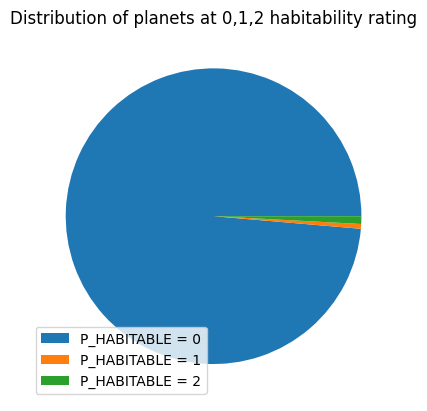

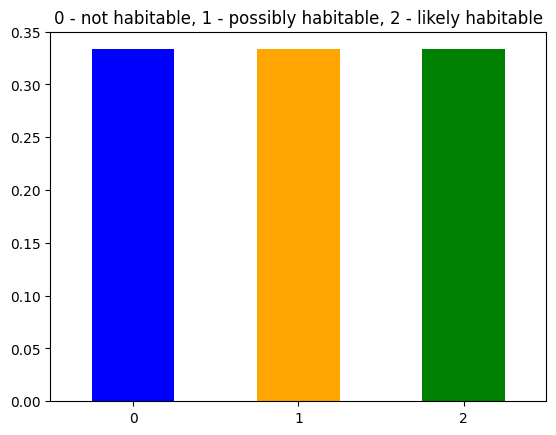

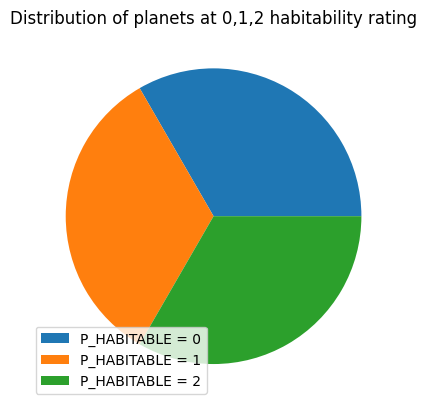

In [ ]:
#balancing data

#version w/o SMOTE - complete
#SMOTE - incomplete
from sklearn.utils import resample
not_hab = data[data.P_HABITABLE == 0]
maybe_hab = data[data.P_HABITABLE == 1]
hab = data[data.P_HABITABLE == 2]

#pie chart before balancing the data
plt.figure()
hab_data = data['P_HABITABLE'].value_counts()
freq = [hab_data[0],hab_data[1],hab_data[2]]
plt.pie(freq)
plt.legend(['P_HABITABLE = 0','P_HABITABLE = 1','P_HABITABLE = 2'], loc = 'lower left')
plt.title('Distribution of planets at 0,1,2 habitability rating')
plt.show()

re_maybe_hab = resample(maybe_hab, replace=True, n_samples = len(not_hab), random_state=1)
oversampled = pd.concat([not_hab, re_maybe_hab])
re_hab = resample(hab, replace=True, n_samples=len(not_hab), random_state=1)
oversampled = pd.concat([oversampled, re_hab])

plt.figure()
oversampled.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color = ['blue','orange','green'], rot=0)
plt.title('0 - not habitable, 1 - possibly habitable, 2 - likely habitable')

#pie chart after balancing the data
plt.figure()
hab_data = oversampled['P_HABITABLE'].value_counts()
freq = [hab_data[0],hab_data[1],hab_data[2]]
plt.pie(freq)
plt.legend(['P_HABITABLE = 0','P_HABITABLE = 1','P_HABITABLE = 2'], loc = 'lower left')
plt.title('Distribution of planets at 0,1,2 habitability rating')
plt.show()


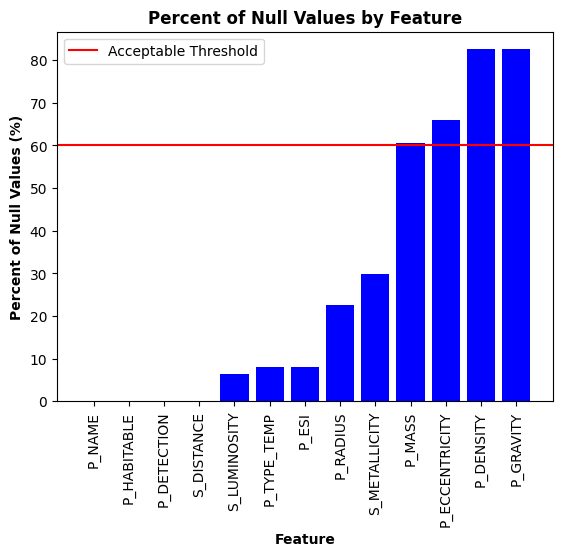

In [ ]:
#Step Two: Exploratory Data Analysis
#Analyzing Percent of Null Values in Features for Cleaning

#Extracting key features for analysis in new df
data_refined = data[['P_NAME','P_HABITABLE','P_DETECTION','S_DISTANCE','S_LUMINOSITY','P_TYPE_TEMP','P_ESI','P_RADIUS','S_METALLICITY','P_MASS','P_ECCENTRICITY','P_DENSITY','P_GRAVITY']]
null_vals=100*data_refined.isna().sum()/data_refined.shape[0]

#plot
plt.bar(null_vals.index, null_vals.values,color='b')
plt.xlabel('Feature',fontweight='bold')
plt.ylabel('Percent of Null Values (%)',fontweight='bold')
plt.title('Percent of Null Values by Feature',fontweight='bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.axhline(y=60, color='r', linestyle='-', label='Acceptable Threshold')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Step Three: Data Cleaning
#Filling missing values in each feature with median value (grouped by habitability status)
median_df= data_refined.groupby('P_HABITABLE').agg({
    'P_MASS': ['median'],
    'P_ECCENTRICITY': ['median'],
    'P_DENSITY': ['median'],
    'P_GRAVITY': ['median'],
    'S_METALLICITY': ['median'],
    'P_RADIUS': ['median'],
    'P_ESI': ['median'],
    'S_LUMINOSITY': ['median'],
    'S_DISTANCE': ['median'],})
median_df.columns= median_df.columns.map('_'.join)
median_df

,P_MASS_median,P_ECCENTRICITY_median,P_DENSITY_median,P_GRAVITY_median,S_METALLICITY_median,P_RADIUS_median,P_ESI_median,S_LUMINOSITY_median,S_DISTANCE_median
P_HABITABLE,,,,,,,,,
0,283.502580,0.100,0.198418,1.657761,0.02,2.34289,0.270042,0.923442,484.62
1,1.715000,0.061,0.841952,0.709383,-0.19,1.16584,0.798200,0.009858,6.80
2,6.979503,0.180,1.015376,1.968272,-0.07,2.07385,0.718392,0.090056,261.50


In [ ]:
#Updating df with median values
median_df['P_HABITABLE']=median_df.index
median_df=median_df.reset_index(drop=True)
data_refined=data_refined.merge(median_df,how='left',on=['P_HABITABLE'])


In [ ]:
#Filling NaN values with respective median values
data_refined['P_MASS'].fillna(data_refined['P_MASS_median'], inplace=True)
data_refined['P_ECCENTRICITY'].fillna(data_refined['P_ECCENTRICITY_median'], inplace=True)
data_refined['P_DENSITY'].fillna(data_refined['P_DENSITY_median'], inplace=True)
data_refined['P_GRAVITY'].fillna(data_refined['P_GRAVITY_median'], inplace=True)
data_refined['S_METALLICITY'].fillna(data_refined['S_METALLICITY_median'], inplace=True)
data_refined['P_RADIUS'].fillna(data_refined['P_RADIUS_median'], inplace=True)
data_refined['P_ESI'].fillna(data_refined['P_ESI_median'], inplace=True)
data_refined['S_LUMINOSITY'].fillna(data_refined['S_LUMINOSITY_median'], inplace=True)
data_refined['S_DISTANCE'].fillna(data_refined['S_DISTANCE_median'], inplace=True)

In [ ]:
data_refined

,P_NAME,P_HABITABLE,P_DETECTION,S_DISTANCE,S_LUMINOSITY,P_TYPE_TEMP,P_ESI,P_RADIUS,S_METALLICITY,P_MASS,...,P_GRAVITY,P_MASS_median,P_ECCENTRICITY_median,P_DENSITY_median,P_GRAVITY_median,S_METALLICITY_median,P_RADIUS_median,P_ESI_median,S_LUMINOSITY_median,S_DISTANCE_median
0,11 Com b,0,Radial Velocity,93.37,163.546800,Hot,0.083813,2.34289,-0.35,6165.863300,...,1.657761,283.502580,0.100,0.198418,1.657761,0.02,2.34289,0.270042,0.923442,484.62
1,11 UMi b,0,Radial Velocity,125.72,250.492940,Hot,0.082414,2.34289,-0.02,4684.784800,...,1.657761,283.502580,0.100,0.198418,1.657761,0.02,2.34289,0.270042,0.923442,484.62
2,14 And b,0,Radial Velocity,75.59,58.175144,Hot,0.081917,2.34289,-0.24,1525.574400,...,1.657761,283.502580,0.100,0.198418,1.657761,0.02,2.34289,0.270042,0.923442,484.62
3,14 Her b,0,Radial Velocity,17.94,0.629171,Cold,0.145241,2.34289,0.41,1481.078500,...,1.657761,283.502580,0.100,0.198418,1.657761,0.02,2.34289,0.270042,0.923442,484.62
4,16 Cyg B b,0,Radial Velocity,21.15,1.250596,Warm,0.368627,2.34289,0.06,565.733850,...,1.657761,283.502580,0.100,0.198418,1.657761,0.02,2.34289,0.270042,0.923442,484.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,2,Transit,160.00,0.025403,Warm,0.755038,1.87000,0.00,6.979503,...,1.968272,6.979503,0.180,1.015376,1.968272,-0.07,2.07385,0.718392,0.090056,261.50
4044,K2-296 c,0,Transit,160.00,0.025403,Hot,0.363831,2.76000,0.00,283.502580,...,1.657761,283.502580,0.100,0.198418,1.657761,0.02,2.34289,0.270042,0.923442,484.62
4045,GJ 1061 b,0,Radial Velocity,3.69,0.001658,Hot,0.588562,2.34289,-0.08,1.380000,...,1.657761,283.502580,0.100,0.198418,1.657761,0.02,2.34289,0.270042,0.923442,484.62
4046,GJ 1061 c,1,Radial Velocity,3.69,0.001658,Warm,0.879042,1.16584,-0.08,1.750000,...,0.709383,1.715000,0.061,0.841952,0.709383,-0.19,1.16584,0.798200,0.009858,6.80


In [ ]:
#Clipping outliers to IQR value
import scipy as sp



# detecting outliers with IQR (interquartile range)
Q1 = data_cl.quantile(0.25)
Q3 = data_cl.quantile(0.75)
IQR = Q3 - Q1

# removing outliers
data_cl = data_cl[~((data_cl < (Q1 - 1.5 * IQR)) |(data_cl > (Q3 + 1.5 * IQR))).any(axis=1)]


# finding categorical columns with missing values
data_cl.select_dtypes(include=['object']).columns

data_cl['S_TYPE'] = data_cl['S_TYPE'].fillna(data_cl['S_TYPE'].mode()[0])
data_cl['P_TYPE_TEMP'] = data_cl['P_TYPE_TEMP'].fillna(data_cl['P_TYPE_TEMP'].mode()[0])
data_cl['S_TYPE_TEMP'] = data_cl['S_TYPE_TEMP'].fillna(data_cl['S_TYPE_TEMP'].mode()[0])
data_cl['P_TYPE'] = data_cl['P_TYPE'].fillna(data_cl['P_TYPE'].mode()[0])

data_cl.fillna(data_cl.mean())

<ipython-input-23-f2202a332bad>:41: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data_cl.quantile(0.25)
<ipython-input-23-f2202a332bad>:42: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data_cl.quantile(0.75)
<ipython-input-23-f2202a332bad>:46: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_cl = data_cl[~((data_cl < (Q1 - 1.5 * IQR)) |(data_cl > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-23-f2202a332bad>:52: SettingWithCopyWarning: 
A value is trying

,P_NAME,P_STATUS,P_MASS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,...,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_HABITABLE_TEXT
52,BD-06 1339 b,3.0,8.581356,2.092929,-0.217825,0.252244,2013,2014-05-14,3.872800,-4.000000e-04,...,Hot,0,0.235776,Orion,Ori,Hunter,2.866419,8.581356,0.042800,None (0)
78,CoRoT-22 b,3.0,12.077464,4.876350,-0.392350,0.168150,2014,2014-08-21,9.755980,-1.100000e-04,...,Hot,0,0.159730,Serpens,Ser,Serpent,4.876350,12.077464,0.092000,None (0)
95,CoRoTID 223977153 b,3.0,47.674200,6.389700,-0.560500,0.672600,2017,2017-09-15,6.718370,-1.000000e-05,...,Hot,0,0.132830,Monoceros,Mon,Unicorn,6.389700,47.674200,0.071000,None (0)
103,EPIC 201615463 c,3.0,34.231442,1.221890,-0.168150,0.212990,2019,2019-06-13,3.804640,-1.050000e-03,...,Hot,0,0.285735,Virgo,Vir,Virgin,1.221890,1.993149,0.048773,None (0)
104,EPIC 201754305 d,3.0,34.231442,1.031320,-0.089680,0.089680,2019,2019-06-13,2.715780,-3.100000e-04,...,Hot,0,0.285735,Virgo,Vir,Virgin,1.031320,1.085430,0.033327,None (0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,Kepler-994 b,3.0,34.231442,1.603030,-0.269040,0.067260,2016,2016-05-10,1.151166,-5.700000e-07,...,Hot,0,0.281039,Cygnus,Cyg,Swan,1.603030,3.199163,0.017715,None (0)
3655,Kepler-995 b,3.0,34.231442,2.701610,-0.168150,0.190570,2016,2016-05-10,28.267317,-8.643000e-05,...,Hot,0,0.303789,Lyra,Lyr,Lyre,2.701610,7.760573,0.170631,None (0)
3699,NGC 2682 YBP 1194 b,3.0,101.704960,2.092929,-0.217825,0.252244,2014,2016-07-07,6.959000,-1.000000e-03,...,Hot,0,0.077364,Cancer,Cnc,Crab,12.297015,101.704960,0.071556,None (0)
3700,NGC 2682 YBP 1514 b,3.0,127.131200,2.092929,-0.217825,0.252244,2014,2016-07-07,5.118000,-1.000000e-03,...,Hot,0,0.069112,Cancer,Cnc,Crab,14.024252,127.131200,0.057324,None (0)


Text(0.5, 1.0, 'P_HABITABLE == 1')

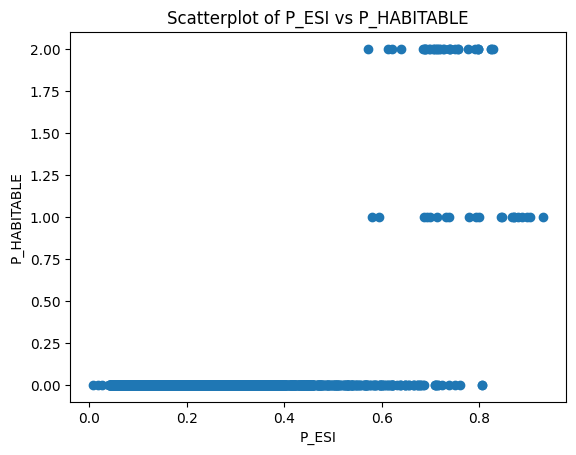

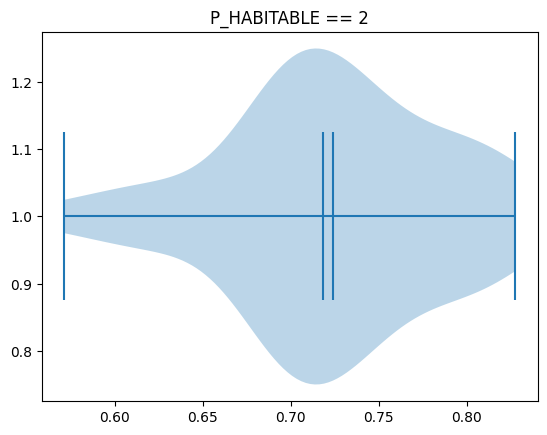

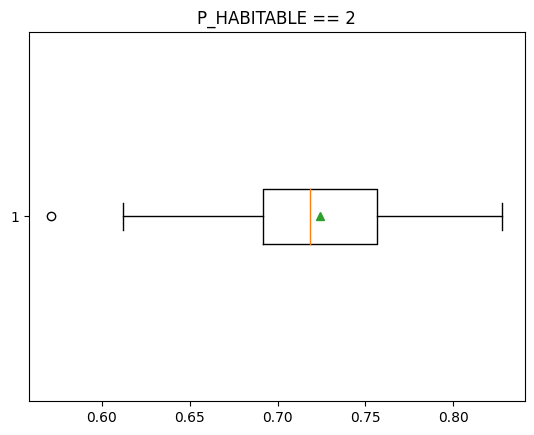

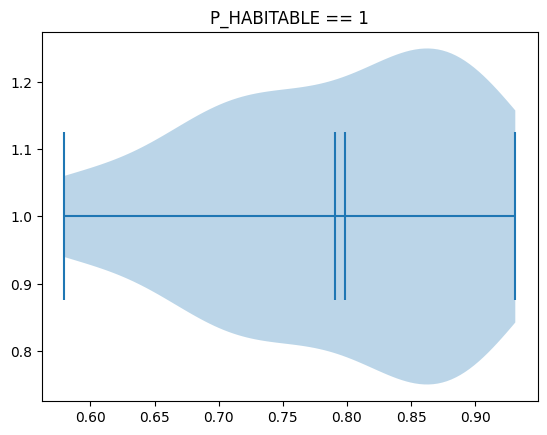

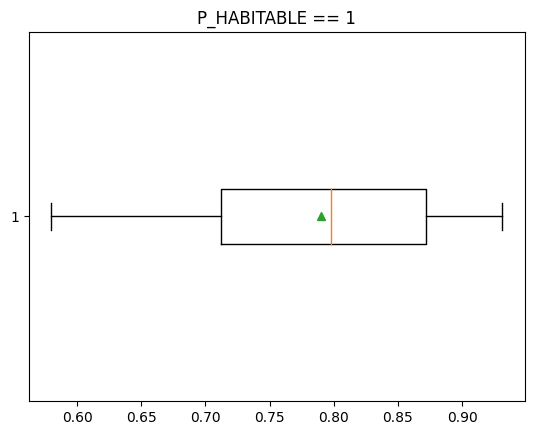

In [ ]:
#Step Four: First Analysis// Earth Similarity Index (ESI) + Planet Terrains
  #violinplot with indicator for extrema, median, and mean of dataset, which is separated by habitability rating
  #Establish correlation between higher ESI and habitability

%matplotlib inline

plt.figure()
plt.scatter(data_refined['P_ESI'], data_refined['P_HABITABLE'])
plt.title('Scatterplot of P_ESI vs P_HABITABLE')
plt.xlabel('P_ESI')
plt.ylabel('P_HABITABLE')


plt.figure()
plt.violinplot(data_refined['P_ESI'].loc[data_refined['P_HABITABLE']==2].dropna(axis=0), vert=False, showmeans=True, showmedians=True)
plt.title('P_HABITABLE == 2')
plt.figure()
plt.boxplot(data_refined['P_ESI'].loc[data_refined['P_HABITABLE']==2].dropna(axis=0), vert=False, showmeans=True)
plt.title('P_HABITABLE == 2')

plt.figure()
plt.violinplot(data_refined['P_ESI'].loc[data_refined['P_HABITABLE']==1].dropna(axis=0), vert=False, showmeans=True, showmedians=True)
plt.title('P_HABITABLE == 1')
plt.figure()
plt.boxplot(data_refined['P_ESI'].loc[data_refined['P_HABITABLE']==1].dropna(axis=0), vert=False, showmeans=True)
plt.title('P_HABITABLE == 1')




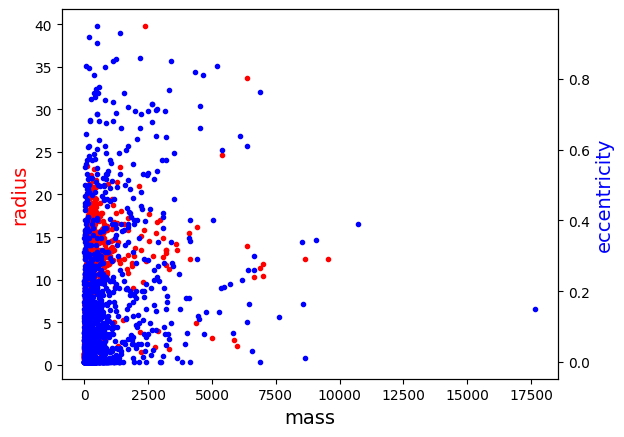

In [ ]:
#Step Five: Second Analysis //  Planet Mass, Radius,Eccentricity // Scatterplot with Heat Map on Three variables
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
data = pd.read_csv('phl_exoplanet_catalog_2019.csv')

fig,ax = plt.subplots()
ax.plot(data.iloc[:,2],data.iloc[:,5], 'r.')
ax.set_xlabel("mass", fontsize = 14)
ax.set_ylabel("radius", color="red", fontsize=14,)

ax2=ax.twinx()
ax2.plot(data.iloc[:,2],data.iloc[:,16], 'b.')
ax2.set_ylabel("eccentricity",color="blue",fontsize=14)
plt.show()

Text(0.5, 0.92, 'Habitability vs Mass')

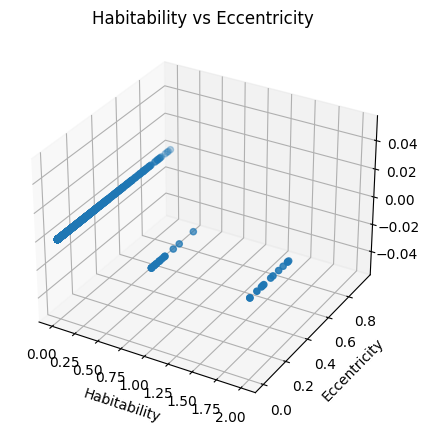

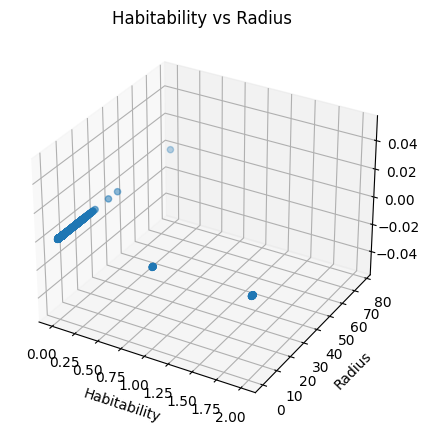

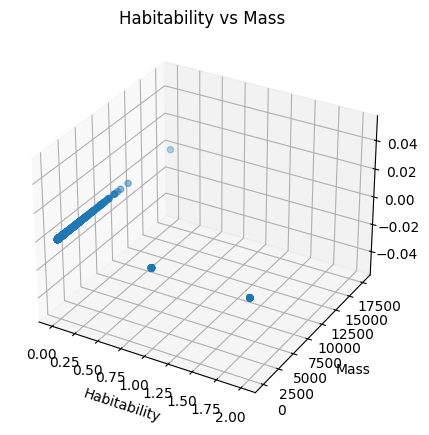

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('phl_exoplanet_catalog_2019.csv')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['P_HABITABLE'],data['P_ECCENTRICITY'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Eccentricity')
plt.title('Habitability vs Eccentricity')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['P_HABITABLE'],data['P_RADIUS'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Radius')
plt.title('Habitability vs Radius')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['P_HABITABLE'],data['P_MASS'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Mass')
plt.title('Habitability vs Mass')


Text(0.5, 1.0, 'Habitability vs Luminosity')

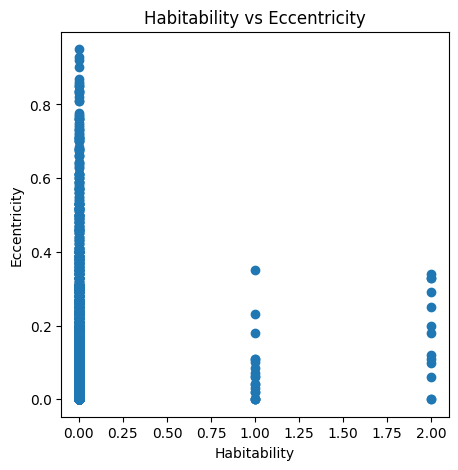

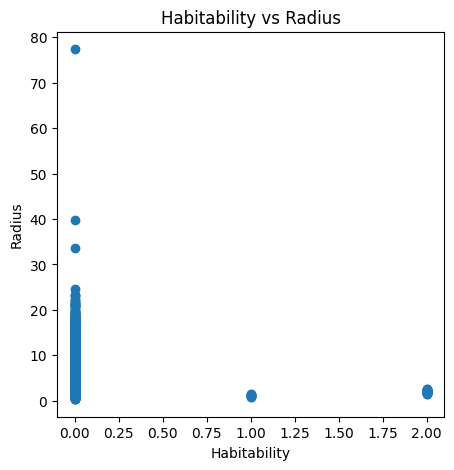

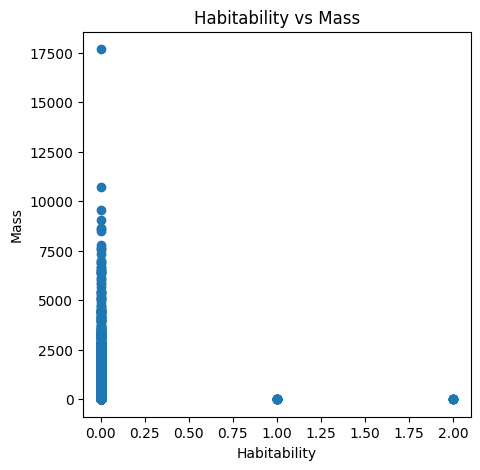

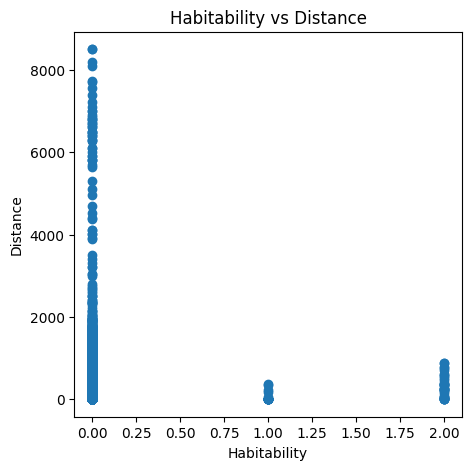

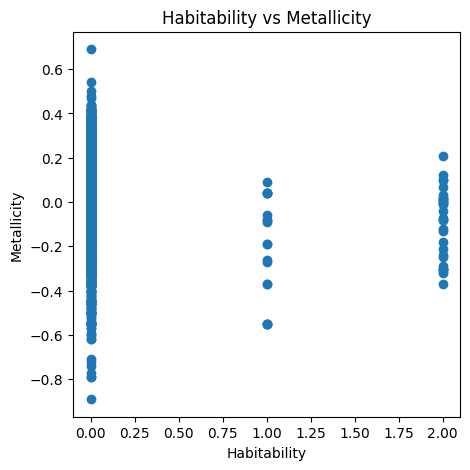

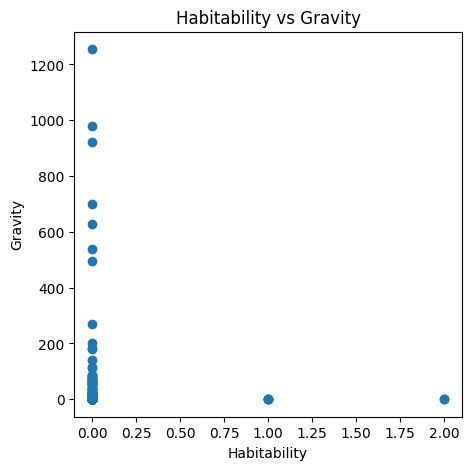

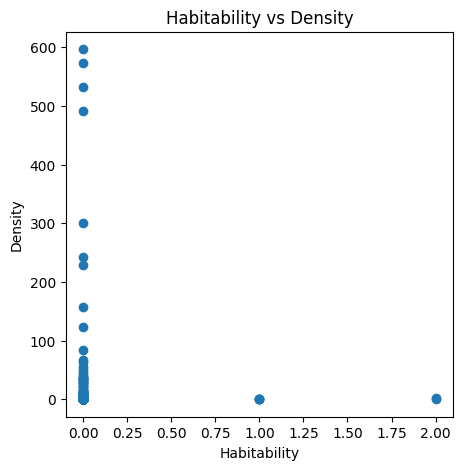

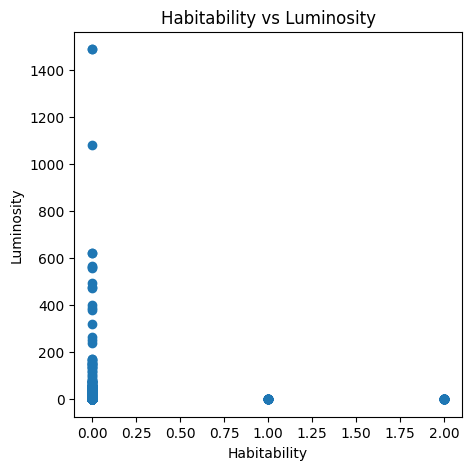

In [ ]:
data = pd.read_csv('phl_exoplanet_catalog_2019.csv')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111)
ax.scatter(data['P_HABITABLE'],data['P_ECCENTRICITY'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Eccentricity')
plt.title('Habitability vs Eccentricity')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111)
ax.scatter(data['P_HABITABLE'],data['P_RADIUS'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Radius')
plt.title('Habitability vs Radius')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111)
ax.scatter(data['P_HABITABLE'],data['P_MASS'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Mass')
plt.title('Habitability vs Mass')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111)
ax.scatter(data['P_HABITABLE'],data['S_DISTANCE'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Distance')
plt.title('Habitability vs Distance')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111)
ax.scatter(data['P_HABITABLE'],data['S_METALLICITY'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Metallicity')
plt.title('Habitability vs Metallicity')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111)
ax.scatter(data['P_HABITABLE'],data['P_GRAVITY'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Gravity')
plt.title('Habitability vs Gravity')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111)
ax.scatter(data['P_HABITABLE'],data['P_DENSITY'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Density')
plt.title('Habitability vs Density')

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111)
ax.scatter(data['P_HABITABLE'],data['S_LUMINOSITY'], marker='o')

ax.set_xlabel('Habitability')
ax.set_ylabel('Luminosity')
plt.title('Habitability vs Luminosity')

Text(0.5, 0.92, 'Radius vs Eccentricity vs Mass')

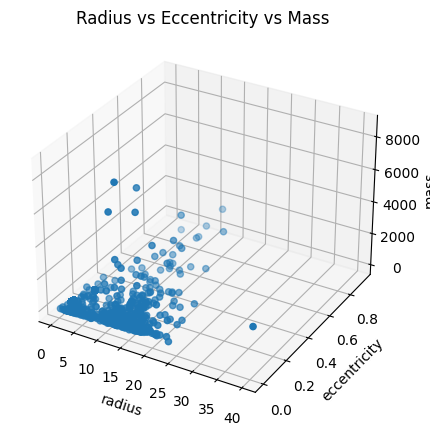

In [ ]:
#3d scatter plot

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('phl_exoplanet_catalog_2019.csv')
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(oversampled['P_RADIUS'],oversampled['P_ECCENTRICITY'], oversampled['P_MASS'], marker='o')

ax.set_xlabel('radius')
ax.set_ylabel('eccentricity')
ax.set_zlabel('mass', rotation = 90)
plt.title('Radius vs Eccentricity vs Mass')

2, 1, or 0 refers to the habitability ratings graphed in the corresponding heatmap.


Text(0.5, 1.0, '0')

<Figure size 800x600 with 0 Axes>

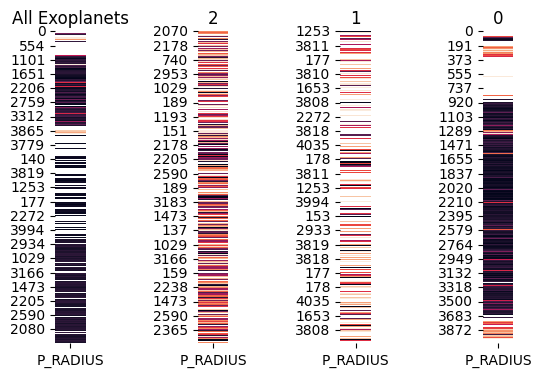

<Figure size 800x600 with 0 Axes>

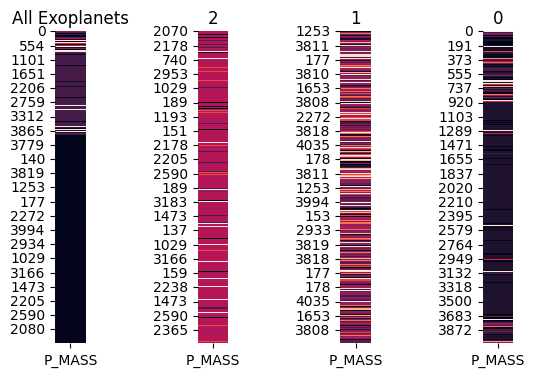

<Figure size 800x600 with 0 Axes>

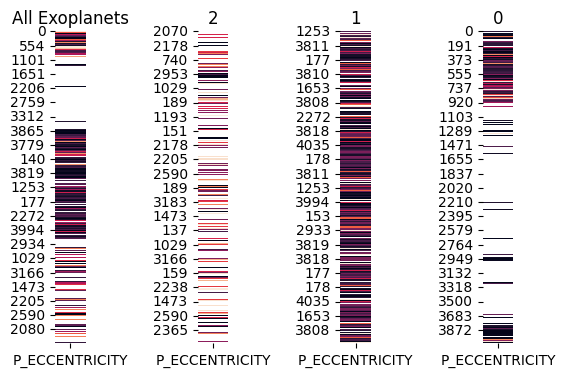

In [ ]:
#heatmaps for frequency of planets with respect to radius, mass, and eccentricity
#darker color - lower frequency
#lighter color - higher frequency

import seaborn as sns
%matplotlib inline

plt.figure(figsize = [8,6])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.tight_layout(pad=5)
sns.heatmap(oversampled[['P_RADIUS']], robust=True, ax=ax1, cbar=False)
sns.heatmap(oversampled[['P_RADIUS']].loc[oversampled['P_HABITABLE'] == 2], robust=True, ax=ax2, cbar=False)
sns.heatmap(oversampled[['P_RADIUS']].loc[oversampled['P_HABITABLE'] == 1], robust=True, ax=ax3, cbar=False)
sns.heatmap(oversampled[['P_RADIUS']].loc[oversampled['P_HABITABLE'] == 0], robust=True, ax=ax4, cbar=False)
ax1.set_title('All Exoplanets')
ax2.set_title('2')
ax3.set_title('1')
ax4.set_title('0')
print('2, 1, or 0 refers to the habitability ratings graphed in the corresponding heatmap.')

plt.figure(figsize = [8,6])
fig2, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig2.tight_layout(pad=5)
sns.heatmap(oversampled[['P_MASS']], robust=True, ax=ax1, cbar=False)
sns.heatmap(oversampled[['P_MASS']].loc[oversampled['P_HABITABLE'] == 2], robust=True, ax=ax2, cbar=False)
sns.heatmap(oversampled[['P_MASS']].loc[oversampled['P_HABITABLE'] == 1], robust=True, ax=ax3, cbar=False)
sns.heatmap(oversampled[['P_MASS']].loc[oversampled['P_HABITABLE'] == 0], robust=True, ax=ax4, cbar=False)
ax1.set_title('All Exoplanets')
ax2.set_title('2')
ax3.set_title('1')
ax4.set_title('0')

plt.figure(figsize = [8,6])
fig3, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig3.tight_layout(pad=5)
sns.heatmap(oversampled[['P_ECCENTRICITY']], robust=True, ax = ax1, cbar=False)
sns.heatmap(oversampled[['P_ECCENTRICITY']].loc[oversampled['P_HABITABLE'] == 2], robust=True, ax = ax2, cbar=False)
sns.heatmap(oversampled[['P_ECCENTRICITY']].loc[oversampled['P_HABITABLE'] == 1], robust=True, ax = ax3, cbar=False)
sns.heatmap(oversampled[['P_ECCENTRICITY']].loc[oversampled['P_HABITABLE'] == 0], robust=True, ax = ax4, cbar=False)
ax1.set_title('All Exoplanets')
ax2.set_title('2')
ax3.set_title('1')
ax4.set_title('0')


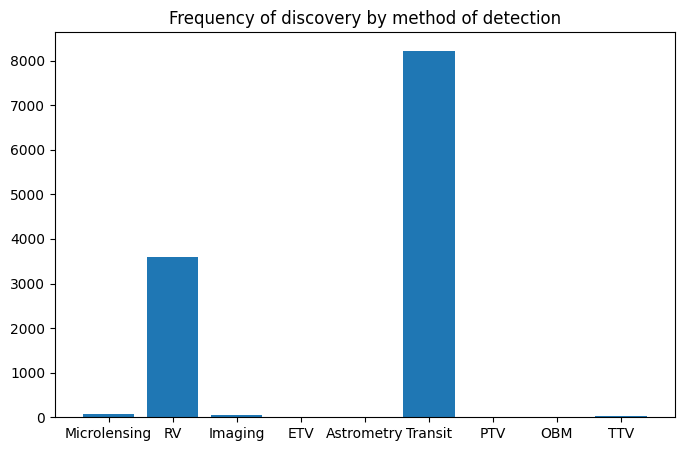

In [ ]:
#bar graph for detection method

frequency = []
frequency.append(oversampled['P_DETECTION'].value_counts()['Microlensing'])
frequency.append(oversampled['P_DETECTION'].value_counts()['Radial Velocity'])
frequency.append(oversampled['P_DETECTION'].value_counts()['Imaging'])
frequency.append(oversampled['P_DETECTION'].value_counts()['Eclipse Timing Variations'])
frequency.append(oversampled['P_DETECTION'].value_counts()['Astrometry'])
frequency.append(oversampled['P_DETECTION'].value_counts()['Transit'])
frequency.append(oversampled['P_DETECTION'].value_counts()['Pulsation Timing Variations'])
frequency.append(oversampled['P_DETECTION'].value_counts()['Orbital Brightness Modulation'])
frequency.append(oversampled['P_DETECTION'].value_counts()['Transit Timing Variations'])

detection = ['Microlensing', 'RV', 'Imaging', 'ETV', 'Astrometry', 'Transit', 'PTV', 'OBM','TTV']
plt.figure(figsize = (8,5))
plt.bar(detection, frequency)
plt.title('Frequency of discovery by method of detection')
plt.show()

In [ ]:
#STEP Six: Statistical Analysis (2 Sample T Test)
#2 sample t-tests on data to test statistical significance of each variable
import numpy as np
from scipy import stats

def stat_sig(p):
  if (p<.05): #alpha = 0.05
    return True
  else:
    return False

def conduct_ttest(variable):
  print('\033[1m'+variable+'\033[0m')
  hab2 = data_refined[variable].loc[data_refined['P_HABITABLE'] == 2].dropna(axis=0)
  hab1 = data_refined[variable].loc[data_refined['P_HABITABLE'] == 1].dropna(axis=0)
  hab0 = data_refined[variable].loc[data_refined['P_HABITABLE'] == 0].dropna(axis=0)
  result = stats.ttest_ind(hab2, hab1)
  result2 = stats.ttest_ind(hab1, hab0)
  result3 = stats.ttest_ind(hab2, hab0)
  print('2 vs 1: '+str(result)+'   significant = '+str(stat_sig(result.pvalue))+'\n1 vs 0: '+str(result2)+'   significant = '+str(stat_sig(result2.pvalue))+'\n2 vs 0: '+str(result3)+\
      '   significant = '+str(stat_sig(result3.pvalue))+'\n')
  print(' mean of P_HABITABLE == 2:',np.mean(hab2))
  print(' mean of P_HABITABLE == 1:',np.mean(hab1))
  print(' mean of P_HABITABLE == 0:',np.mean(hab0))
  print()

conduct_ttest('P_MASS')
conduct_ttest('P_ECCENTRICITY')
conduct_ttest('P_RADIUS')
conduct_ttest('S_DISTANCE')
conduct_ttest('S_METALLICITY')
conduct_ttest('P_GRAVITY')
conduct_ttest('P_DENSITY')
conduct_ttest('S_LUMINOSITY')




P_MASS
2 vs 1: Ttest_indResult(statistic=25.713808700022405, pvalue=1.3211488480555177e-31)   significant = True
1 vs 0: Ttest_indResult(statistic=-2.425593359105264, pvalue=0.015327215131266734)   significant = True
2 vs 0: Ttest_indResult(statistic=-3.0542445360008603, pvalue=0.002271044228607319)   significant = True

 mean of P_HABITABLE == 2: 6.9805311764705875
 mean of P_HABITABLE == 1: 1.8874745933333335
 mean of P_HABITABLE == 0: 491.17164731347384

P_ECCENTRICITY
2 vs 1: Ttest_indResult(statistic=2.6048685968115537, pvalue=0.014163065827715968)   significant = True
1 vs 0: Ttest_indResult(statistic=-1.911005107304534, pvalue=0.056213202796821564)   significant = False
2 vs 0: Ttest_indResult(statistic=0.28629462406468814, pvalue=0.7746961113620403)   significant = False

 mean of P_HABITABLE == 2: 0.17761538461538462
 mean of P_HABITABLE == 1: 0.07942105263157895
 mean of P_HABITABLE == 0: 0.16255327892952523

P_RADIUS
2 vs 1: Ttest_indResult(statistic=7.533667127913777, pvalu